### Assingment 5. 

Name: Sifael Sebastian Ndandala <br>
Date: Mittwoch, 17. April. 2024 <br>

**1. Find and Download a Data Set [5 Points ]**

See the project guidelines on TEAMS for hints how to find and choose interesting data sets.The data set should have at least 2 features.  It does not have to be huge, but should contain atleast several hundred data points.  
1. Describe the raw dataset you have chosen for the project in mathematical correct formalism, define the universe in which the data has been taken, the RV functions, and the data value spaces S. <br>
2. Describe whether you had to clean the data, whether there are any missing values. <br>
3. How did you deal with missing values? <br>
4. Show excerpts of the raw data.


**2. Distribution, Moments [5 Points ]**

Choose from this data set 1 numerical features where you have at least 100 measurements withresults in a discrete DVS   S (if it is a continous S, choose intervals with some bin width d, tomap it on a discrete S). <br>
a) Plot the corresponding histograms and the pmf of this discrete distribution. <br>
b) Calculate the mean value, the standard deviation, the skewness and the kurtosis of this dis-tribution. <br>
c) Check all kinds of distributions which we reviewed in the lecture.  To which kind of dis-tribution function does the pmf of the feature you choose resemble most closely?   <br>
Find thehyperparameters of that distribution function which minimise the MSE.

<br>

## <font style="color:rgb(50,120,229)"> Question 1: Summarizing the Dataset in Mathematical Formulation </font>

<br>

#### <font style="color:rgb(50,120,229)"> 1.1. Dataset Summary: Financial Phrase Bank </font>

The selected dataset for my project is the Financial Phrase Bank dataset. The dataset is a Polar Sentiment dataset of sentences from financial news. The dataset consists of 4840 sentences from English language financial news categorised by sentiment. The selected collection of phrases was annotated by 16 people with adequate background knowledge on financial markets. The dataset is divided by agreement rate of 5-8 annotators, all of which determine whether the financial news phrase is `positive`, `neutral` or `negative`. In essence, that data is a pair of `financial news phrases` and their respective sentiment $positive\ , neutral\ , negative$

<br>

#### <font style="color:rgb(50,120,229)">  1.2. Mathematical Formalism </font>

Below is the Mathematical Formalism of the Dataset


#### <font style="color:rgb(50,120,229)">  1.3. Universe of the Dataset.</font> 

The universe $\Omega$ of the dataset "financial_phrasebank" is the collection of all individual phrases (or sentences) from global financial news articles. Each phrase is collected under certain constraints, likely within a specific time frame and from specific sources that publish financial news.

$$ \Omega = \text{All Financial News Articles Published and their respective Sentiment}$$


<br>

#### <font style="color:rgb(50,120,229)">  1.4. Random Variable Function of the Dataset </font>  

The Random Variable Function of the Dataset for Financial News and respective sentiment can be given as follows:

$ X_{F}: \text{ financial news }$ <br>
$ X_{S}: \text{ sentiment associated with the financial news} $


Therefore:

$ X_F : \Omega \mapsto S_{f} $ where $S_{f} = \text {\{financial news phrases selected \}} $<br>
$X_S : \Omega \mapsto S_{s}$   where $S_{s} = \text {\{positive, negative, neutral\}} $

<br>

#### <font style="color:rgb(50,120,229)">  1.4. Product RV and DVS </font>

Based on the above definition, the Product RV and Data Value space is given by the following formalism:

$$X = X_{F} \otimes  X_{S}$$

Therefore, the product DVS is:

$$ S_{I} = S_{F} \times S_{S} $$

The index $I$ contains a paired set such that $i = \text { \{ financial news, sentiment\} }$

<br>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [23]:
pd.set_option('max_colwidth', 150)

In [24]:
financial_news = pd.read_csv('financial_news.txt')
financial_news.head()

,sentence,label
0,"According to Gran , the company has no plans to move all production to Russia , although that is where the company is growing .",1
1,"Technopolis plans to develop in stages an area of no less than 100,000 square meters in order to host companies working in computer technologies a...",1
2,The international electronic industry company Elcoteq has laid off tens of employees from its Tallinn facility ; contrary to earlier layoffs the c...,0
3,With the new production plant the company would increase its capacity to meet the expected increase in demand and would improve the use of raw mat...,2
4,"According to the company 's updated strategy for the years 2009-2012 , Basware targets a long-term net sales growth in the range of 20 % -40 % wit...",2


<br>

### <font style="color:rgb(50,120,229)"> Data Acquisition and Basic Preprocessing </font>

The dataset is available through HuggingFace, an online collective of datasets for specific analysis and machine learning processing. The data can be downloaded using the following code.

```python
from datasets import load_dataset

dataset = load_dataset("financial_phrasebank", "sentences_50agree")
```
<br>

### <font style="color:rgb(50,120,229)"> Cleaning and Missing Values </font>

The data is well curated and does not contain missing values. However, feature extraction is need to understand the dataset. For example computing the length of characters or tokens from the text to understand the distribution of labels to financial text.

In [27]:
len(financial_news)

4846

In [26]:
financial_news.label.value_counts(normalize=True)

label
1    0.594098
2    0.281263
0    0.124639
Name: proportion, dtype: float64

<br>

## <font style="color:rgb(50,120,229)"> Question 2: Distribution, Moments </font>


In [28]:
financial_news['tokens'] = financial_news['sentence'].str.split().apply(len)

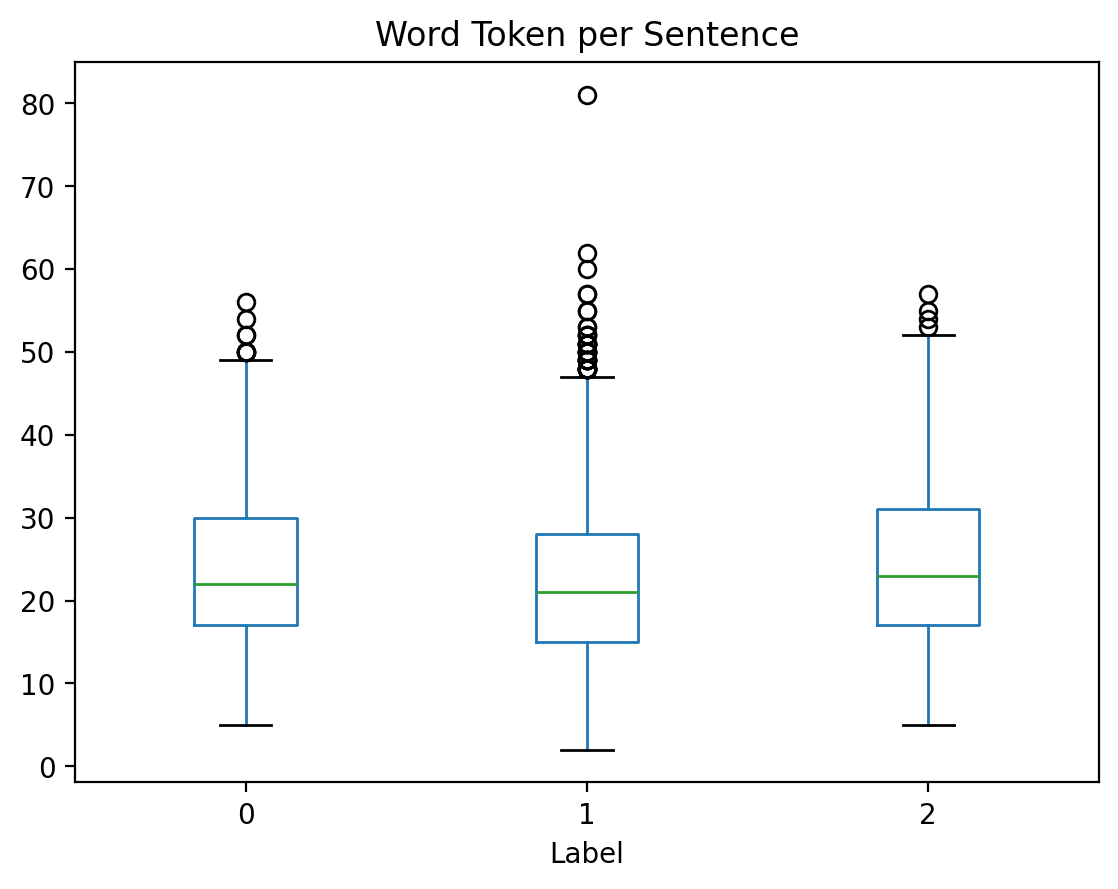

In [34]:
financial_news.boxplot("tokens", by="label", grid=False, showfliers=True)
plt.title('Word Token per Sentence')
plt.suptitle('')
plt.xlabel('Label')
plt.show();

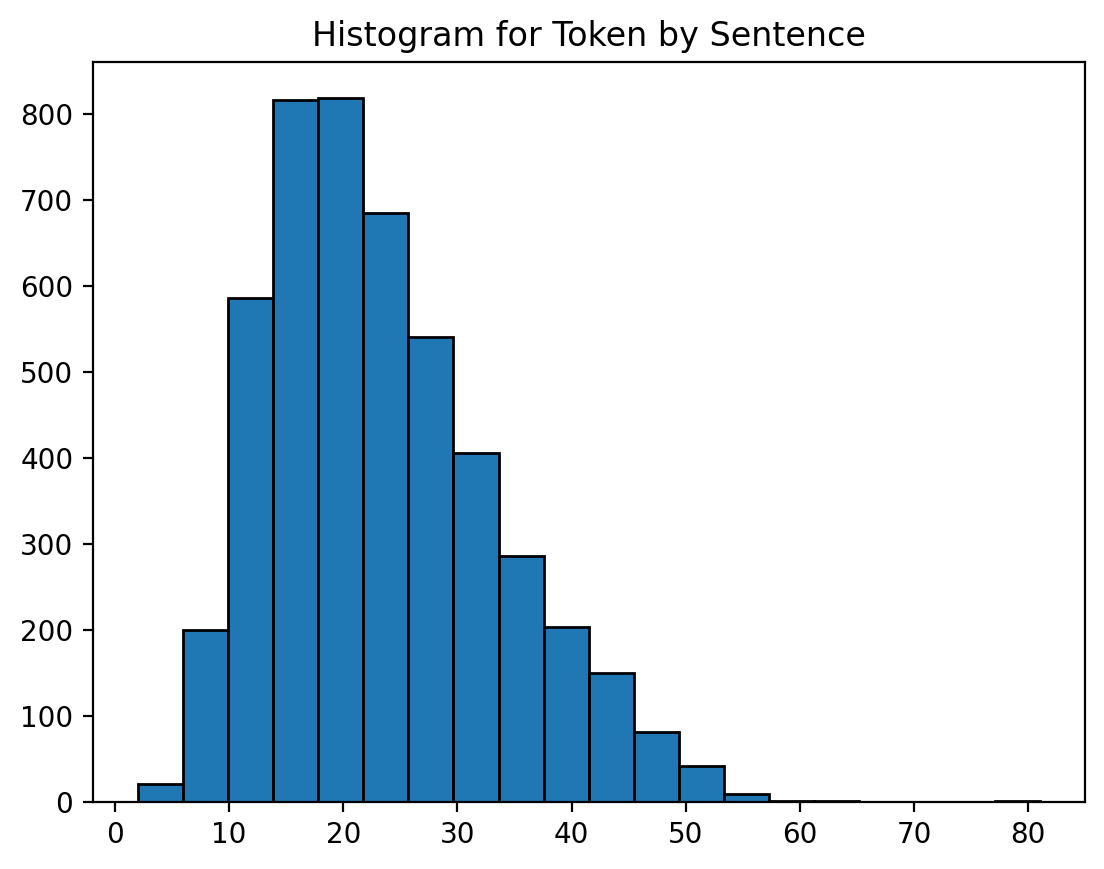

In [38]:
plt.hist(financial_news.tokens, ec='black', bins=20 )
plt.title('Histogram for Token by Sentence')
#plt.show()
plt.savefig('token-distribution.png')

In [39]:
np.mean(financial_news.tokens), np.var(financial_news.tokens)

(23.101114321089558, 99.15073338478459)